In [2]:
from bs4 import BeautifulSoup # For HTML parsing
from urllib.request import urlopen # Website connections
import re # Regular expressions
from time import sleep # To prevent overwhelming the server between connections
from collections import Counter # Keep track of our term counts
from nltk.corpus import stopwords # Filter out stopwords, such as 'the', 'or', 'and'
import pandas as pd # For converting results to a dataframe and bar chart plots
%matplotlib inline
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Ben\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [12]:
def text_cleaner(website):
    '''
    Inputs: url
    Outputs: list of unique words
    '''
    try:
        site = urlopen(website).read() # Connect to the job posting
    except: 
        return   # Need this in case the website isn't there anymore or some other weird connection problem 
    
    soup_obj = BeautifulSoup(site,"lxml") # Get the html from the site
    
#     for script in soup_obj(["script", "style"]):
#         script.extract() # Remove these two elements from the BS4 object
    
    
    mydivs = soup_obj.find("div", {"class":"jobsearch-JobComponent-description"})
    
    if mydivs:
        text = mydivs.text # Get the text from this
    else:
        return

    return text


In [13]:
#Enter and encode search terms
import urllib.parse

search = input("Enter Search Terms: ")
cityST = input("Enter City and State Abbreviation (Boston, MA): ")

encSrch = urllib.parse.quote(search)

encLoc = urllib.parse.quote(cityST)

srchURL = "https://www.indeed.com/jobs?q=" + encSrch + "&l=" + encLoc + "&start=" 


Enter Search Terms: "Data Science"
Enter City and State Abbreviation (Boston, MA): Boston, MA


In [14]:
# boston = skills_info(city = 'Boston', state = 'MA') 

base_url = 'http://www.indeed.com'
total_num_jobs = 2000
    
num_pages = total_num_jobs/10 # This will be how we know the number of times we need to iterate over each new
                                      # search result page
num_pages = int(num_pages)
    
job_descriptions = [] # Store all our descriptions in this list
    
for i in range(0,1): # Loop through all of our search result pages
    print('Getting page ' + str(i)) 
    start_num = str(i*10) # Assign the multiplier of 10 to view the pages we want
    current_page = ''.join([srchURL + start_num]) #replace Boston and MA with different city/state
        # Now that we can view the correct 10 job returns, start collecting the text samples from each
            
    html_page = urlopen(current_page).read() # Get the page
            
    page_obj = BeautifulSoup(html_page) # Locate all of the job links
    job_link_area = page_obj.find(id = 'resultsCol') # The center column on the page where the job postings exist
    job_link_area = job_link_area.find_all('a')        
    job_URLS = [link.get('href') for link in job_link_area] # Get the URLS for the jobs
    job_URLS = [(base_url + str(link)) for link in job_URLS]  
    job_URLS = [links for links in job_URLS if "clk" in links]
        
    for j in range(0,len(job_URLS)):
        final_description = text_cleaner(job_URLS[j])
        if final_description: # So that we only append when the website was accessed correctly
#             job_descriptions.append(j)
            job_descriptions.append(final_description)
        sleep(.5) # So that we don't be jerks. If you have a very fast internet connection you could hit the server a lot! 
        
    print('Done with collecting the job postings!')   

Getting page 0
Done with collecting the job postings!


In [15]:
words = ["indeed.com","boston","job", "JobsCompany", "ReviewsFind", "SalariesFind", "ResumesEmployers", "Post", "Upload", "your", "resume","jobupload","resumesign", "JobsAdvanced", "©", "yrs","experience","work","working","skills","business","resumes","000"
]
words = [x.lower() for x in words]

job_descriptions_test = []

for i in range(len(job_descriptions)):
    y = job_descriptions[i].lower()
    x = [word for word in y.split() if word not in words]
    job_descriptions_test.append(x)
    
for i in range(len(job_descriptions)):
    job_descriptions_test[i] = ' '.join(word for word in job_descriptions_test[i])

In [16]:
documents = job_descriptions_test

In [ ]:
# %cd C:/Users/Ben/Desktop/UNH Classes/DATA 900/
# documents = job_descriptions_test
# # documents.to_csv("documents")

# documents = pd.DataFrame(documents)
# documents.to_csv("documents.csv")

In [17]:
#Import feature_extraction vectorizers from sklearn
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer



no_features = 1000



# NMF is able to use tf-idf

tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, max_features=no_features, stop_words='english')

tfidf = tfidf_vectorizer.fit_transform(documents)

tfidf_feature_names = tfidf_vectorizer.get_feature_names()



# LDA can only use raw term counts for LDA because it is a probabilistic graphical model

tf_vectorizer = CountVectorizer(max_df=0.95, min_df=2, max_features=no_features, stop_words='english')

tf = tf_vectorizer.fit_transform(documents)

tf_feature_names = tf_vectorizer.get_feature_names()

In [18]:
# Import NMF and LDA functions from sklearn
from sklearn.decomposition import NMF, LatentDirichletAllocation

no_topics = 7

# Run NMF

nmf = NMF(n_components=no_topics, random_state=1, alpha=.1, l1_ratio=.5, init='nndsvd').fit(tfidf)

# Run LDA

lda = LatentDirichletAllocation(n_topics=no_topics, max_iter=10, learning_method='online', learning_offset=50.,random_state=1).fit(tf)

C:\Users\Ben\Anaconda3A\lib\site-packages\sklearn\decomposition\online_lda.py:314: DeprecationWarning: n_topics has been renamed to n_components in version 0.19 and will be removed in 0.21
  DeprecationWarning)


In [19]:
def display_topics(model, feature_names, no_top_words):

    for topic_idx, topic in enumerate(model.components_):

        print("Topic %d: " % (topic_idx))
        
        "Topic %d: " % (topic_idx)

        print(" ".join([feature_names[i]

                        for i in topic.argsort()[:-no_top_words - 1:-1]]))

no_top_words = 7


print("LDA:")
display_topics(lda, tf_feature_names, no_top_words)
print("")
print("")

print("NMF:")
display_topics(nmf, tfidf_feature_names, no_top_words)

LDA:
Topic 0: 
integration management based including database support years
Topic 1: 
ability preferred software learning knowledge tools analysis
Topic 2: 
including decision operations analysis race player research
Topic 3: 
learning machine teams analytics solutions program systems
Topic 4: 
years ai hours creative linux problem solutions
Topic 5: 
sales required ai research year microsoft lead
Topic 6: 
learning software management systems value integration practices


NMF:
Topic 0: 
analytics operations analysis statistical areas ability demonstrated
Topic 1: 
software ability learning effectively product preferred levels
Topic 2: 
customer completion applied world program real scientist
Topic 3: 
integration based support management aws culture practices
Topic 4: 
sales year required individual companies events best
Topic 5: 
mining com learning machine www software boston
Topic 6: 
governance value framework culture process quality analytics


In [ ]:
!pip install matplotlib

!pip install wordcloud

C:\Users\Ben\Desktop\UNH Classes\DATA 900


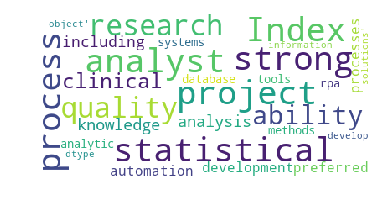

In [63]:
%cd C:/Users/Ben/Desktop/UNH Classes/DATA 900/

import numpy as np # linear algebra
import pandas as pd 
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

from subprocess import check_output
from wordcloud import WordCloud, STOPWORDS

#mpl.rcParams['figure.figsize']=(8.0,6.0)    #(6.0,4.0)
mpl.rcParams['font.size']=12                #10 
mpl.rcParams['savefig.dpi']=100             #72 
mpl.rcParams['figure.subplot.bottom']=.1 


stopwords = set(STOPWORDS)
data = pd.read_csv("LDA6.txt")

wordcloud = WordCloud(
                          background_color='white',
                          stopwords=stopwords,
                          max_words=200,
                          max_font_size=40, 
                          random_state=42
                         ).generate(str(data.columns))

print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
fig.savefig("word1.png", dpi=900)